<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/Python/%D0%A1%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%BE%D0%B3%D0%BE_%D1%87%D0%B0%D1%82_%D0%B1%D0%BE%D1%82%D0%B0_%D0%B2_Python_%D0%B4%D0%BB%D1%8F_Telegram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Создание простого чат-бота в Telegram на Python

## Введение
Telegram — это популярный мессенджер, который предоставляет мощный API для создания ботов. Боты в Telegram способны выполнять широкий спектр задач: от простых ответов на сообщения до сложных операций, таких как управление задачами, поиск информации и многое другое. В этой лекции мы рассмотрим, как создать простого чат-бота с использованием Python и библиотеки `python-telegram-bot`.



## Шаг 1: Установка необходимых инструментов

### 1. Установка Python
Убедитесь, что у вас установлен Python версии 3.12 или выше. Если Python не установлен, скачайте его с [официального сайта](https://www.python.org/downloads/).  
В данном руководстве мы будем использовать редактор кода **VS Code** и установим Python через Microsoft Store.



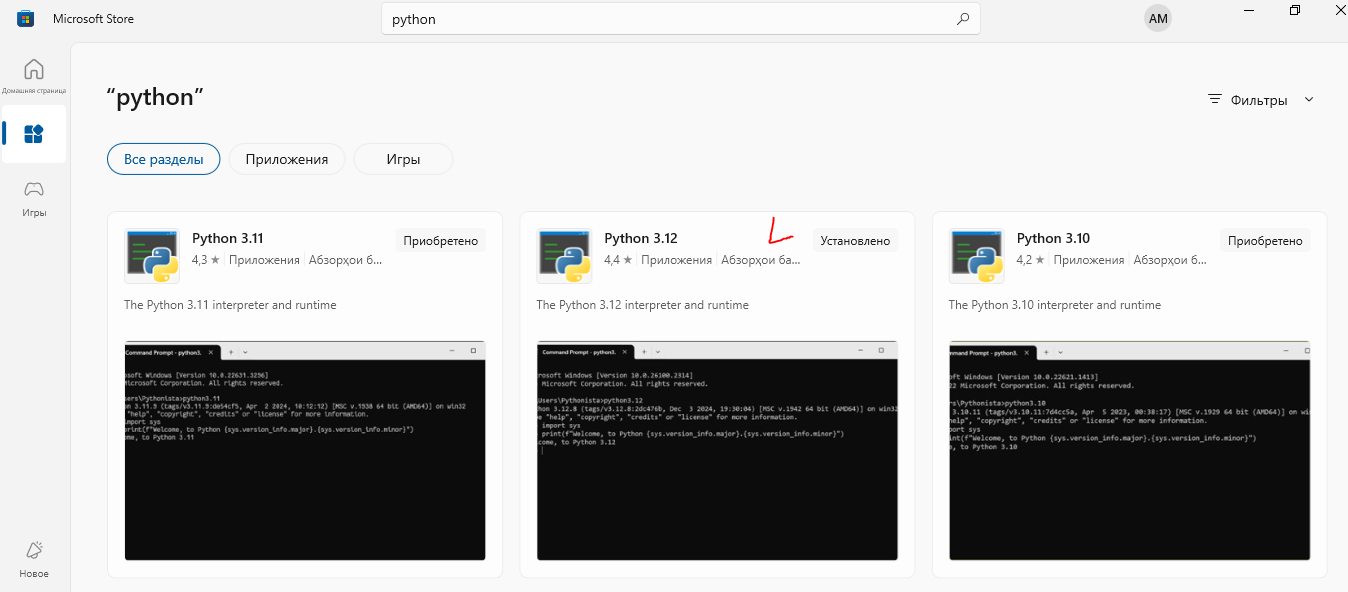

### 2. Установка VS Code
Если у вас еще не установлен VS Code, выполните следующие шаги:
1. Скачайте и установите VS Code с [официального сайта](https://code.visualstudio.com/).
2. После установки откройте VS Code.

### 3. Установка расширения Python
1. В VS Code перейдите в раздел **Extensions** (Расширения) (иконка квадратов в боковой панели).
2. Найдите расширение **Python** от Microsoft и установите его.

### 4. Создание нового проекта
1. **Создайте папку для проекта**:  
   - Выберите удобное место на вашем компьютере (например, рабочий стол или папку для проектов).  
   - Создайте новую папку и назовите её, например, `simple-telegram-bot`. Это будет корневая папка вашего проекта.  

2. **Откройте папку в VS Code**:  
   - Запустите VS Code.  
   - Перейдите в меню **File** > **Open Folder...** и выберите созданную папку `simple-telegram-bot`.  

3. **Создайте файл для кода**:  
   - В боковой панели VS Code нажмите правой кнопкой мыши на пустое место в папке и выберите **New File**.  
   - Назовите файл, например, `bot.py`. Это будет основной файл вашего проекта.  

### 5. Установка библиотеки `python-telegram-bot`
Библиотека `python-telegram-bot` предоставляет удобный интерфейс для работы с Telegram API. Установите её с помощью pip, выполнив следующую команду в терминале:  
1. Откройте терминал в VS Code: **Terminal** > **New Terminal**.  
2. Введите команду:  
   ```bash
   pip install python-telegram-bot
   ```  


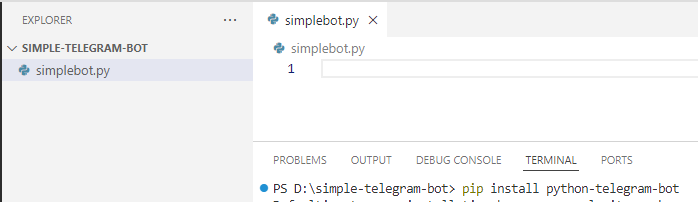


## Шаг 3: Создание бота в Telegram

1. Откройте Telegram и найдите бота `@BotFather`.  
2. Создайте нового бота, следуя инструкциям:  
   - Напишите команду `/start` для начала.  
   - Используйте команду `/newbot` для создания нового бота.  
   - Укажите имя бота (например, `MySimpleBotForExampple`).  
   - Укажите username бота (он должен заканчиваться на `bot`, например, `MySimpleBotForExampple_bot`).  
3. После создания бота вы получите **токен доступа**. Сохраните его, так как он понадобится для подключения к Telegram API.  



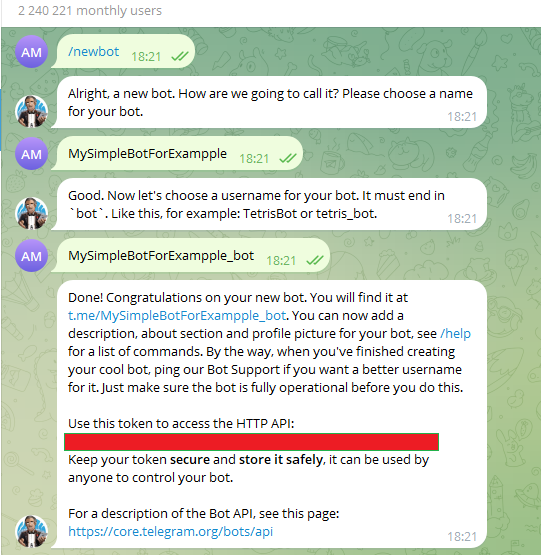


## Шаг 4: Написание кода для бота

### 1. Создание файла `simplebot.py`
Создайте новый файл Python в вашем проекте и назовите его `simplebot.py`.  

### 2. Импорт необходимых библиотек
В начале файла добавьте импорт необходимых модулей из библиотеки `python-telegram-bot`:  
```python
import logging
from telegram import Update
from telegram.ext import Application, CommandHandler, MessageHandler, filters, CallbackContext
```

### 3. Создание функций-обработчиков

#### Обработчик команды `/start`
Эта функция будет вызываться, когда пользователь начнёт взаимодействие с ботом:  
```python
async def start(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Привет! Я простой чат-бот. Как я могу помочь вам сегодня?')
```

#### Обработчик текстовых сообщений
Эта функция будет отвечать на текстовые сообщения пользователя:  
```python
async def echo(update: Update, context: CallbackContext) -> None:
    user_message = update.message.text
    await update.message.reply_text(f'Вы сказали: {user_message}')
```

#### Обработчик ошибок
Эта функция будет логировать ошибки, возникающие в процессе работы бота:  
```python
async def error(update: Update, context: CallbackContext) -> None:
    logger.warning(f'Update {update} caused error {context.error}')
```

### 4. Настройка и запуск бота

#### Функция `main`
Создайте функцию `main`, которая будет настраивать и запускать бота:  
```python
def main() -> None:
    # Замените "YOUR_TELEGRAM_BOT_TOKEN" на ваш токен
    token = "YOUR_TELEGRAM_BOT_TOKEN"

    # Создаем приложение
    application = Application.builder().token(token).build()

    # Регистрация обработчиков
    application.add_handler(CommandHandler("start", start))
    application.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, echo))

    # Регистрация обработчика ошибок
    application.add_error_handler(error)

    # Запуск бота
    logger.info("Бот запущен и работает...")
    application.run_polling()
```

#### Запуск бота
Добавьте вызов функции `main` в конце файла:  
```python
if __name__ == '__main__':
    main()
```

Приведем весь кода:
```python
import logging
from telegram import Update
from telegram.ext import Application, CommandHandler, MessageHandler, filters, CallbackContext

# Настройка логирования
logging.basicConfig(
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    level=logging.INFO
)
logger = logging.getLogger(__name__)

# Обработчик команды /start
async def start(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Привет! Я простой чат-бот. Как я могу помочь вам сегодня?')

# Обработчик текстовых сообщений
async def echo(update: Update, context: CallbackContext) -> None:
    user_message = update.message.text
    await update.message.reply_text(f'Вы сказали: {user_message}')

# Обработчик ошибок
async def error(update: Update, context: CallbackContext) -> None:
    logger.warning(f'Update {update} caused error {context.error}')

# Функция main
def main() -> None:
    # Замените "YOUR_TELEGRAM_BOT_TOKEN" на ваш токен
    token = "YOUR_TELEGRAM_BOT_TOKEN"

    # Создаем приложение
    application = Application.builder().token(token).build()

    # Регистрация обработчиков
    application.add_handler(CommandHandler("start", start))
    application.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, echo))

    # Регистрация обработчика ошибок
    application.add_error_handler(error)

    # Запуск бота
    logger.info("Бот запущен и работает...")
    application.run_polling()

# Запуск бота
if __name__ == '__main__':
    main()
```

## Шаг 5: Запуск и тестирование бота

1. **Запуск скрипта**: Откройте терминал в VS Code и выполните команду:  
   ```bash
   python bot.py
   ```

2. **Тестирование бота**:  
   - Откройте Telegram и найдите своего бота по username.  
   - Начните диалог с ботом, отправив команду `/start`.  
   - Отправьте любое текстовое сообщение и убедитесь, что бот отвечает.  


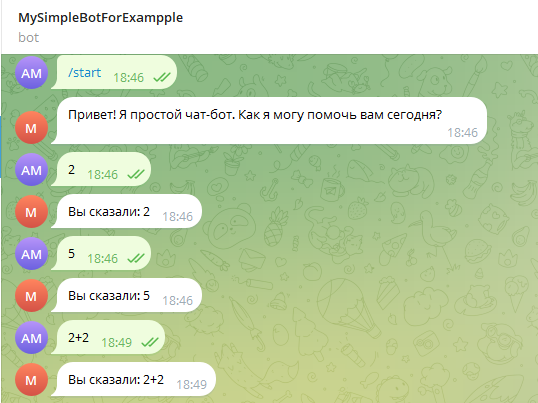

## Шаг 6: Добавление меню в чате

Чтобы добавить меню в чате, мы можем использовать класс `ReplyKeyboardMarkup` из библиотеки `python-telegram-bot`. Это позволит пользователю выбирать команды из предложенных кнопок.

### 1. Изменение функции `start`

Добавим меню с кнопками в ответ на команду `/start`. Для этого изменим функцию `start`:

```python
from telegram import ReplyKeyboardMarkup

async def start(update: Update, context: CallbackContext) -> None:
    user = update.message.from_user
    user_id = user.id
    username = user.username
    first_name = user.first_name
    last_name = user.last_name

    # Сохранение информации о пользователе в базу данных
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('INSERT OR IGNORE INTO users (user_id, username, first_name, last_name) VALUES (?, ?, ?, ?)',
                   (user_id, username, first_name, last_name))
    conn.commit()
    conn.close()

    # Создаем меню с кнопками
    keyboard = [['/start', '/help'], ['/info', '/settings'], ['/profile', '/search']]
    reply_markup = ReplyKeyboardMarkup(keyboard, resize_keyboard=True)
    
    await update.message.reply_text('Привет! Я простой чат-бот. Как я могу помочь вам сегодня?', reply_markup=reply_markup)
```

### 2. Добавление обработчиков для новых команд

Теперь добавим обработчики для команд `/help`, `/info`, `/settings`, `/profile` и `/search`:

```python
async def help_command(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Это команда помощи. Здесь вы можете найти информацию о том, как использовать бота.')

async def info_command(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Это команда информации. Здесь вы можете узнать больше о боте.')

async def settings_command(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Это команда настроек. Здесь вы можете настроить параметры бота.')

async def profile_command(update: Update, context: CallbackContext) -> None:
    user_id = update.message.from_user.id

    # Получение информации о пользователе из базы данных
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('SELECT username, first_name, last_name FROM users WHERE user_id = ?', (user_id,))
    user_info = cursor.fetchone()
    conn.close()

    if user_info:
        username, first_name, last_name = user_info
        await update.message.reply_text(f'Ваш профиль:\nUsername: {username}\nИмя: {first_name}\nФамилия: {last_name}')
    else:
        await update.message.reply_text('Информация о вас не найдена.')

async def search_command(update: Update, context: CallbackContext) -> None:
    # Получаем аргументы команды (например, /search John)
    search_query = ' '.join(context.args).strip()

    if not search_query:
        await update.message.reply_text('Пожалуйста, укажите запрос для поиска. Например: /search John')
        return

    # Отправляем сообщение "Пожалуйста, подождите..."
    wait_message = await update.message.reply_text('Пожалуйста, подождите, пока я думаю...')

    # Имитация задержки (например, для сложных запросов)
    await asyncio.sleep(2)  # Задержка в 2 секунды

    # Поиск пользователей в базе данных
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('''
        SELECT username, first_name, last_name FROM users
        WHERE first_name LIKE ? OR last_name LIKE ? OR username LIKE ?
    ''', (f'%{search_query}%', f'%{search_query}%', f'%{search_query}%'))
    results = cursor.fetchall()
    conn.close()

    # Удаляем сообщение "Пожалуйста, подождите..."
    await context.bot.delete_message(chat_id=update.message.chat_id, message_id=wait_message.message_id)

    if results:
        response = "Результаты поиска:\n"
        for username, first_name, last_name in results:
            response += f"👤 {first_name} {last_name} (@{username})\n"
        await update.message.reply_text(response)
    else:
        await update.message.reply_text('Ничего не найдено.')
```

### 3. Регистрация новых обработчиков

Добавим новые обработчики в функцию `main`:

```python
def main() -> None:
    # Инициализация базы данных
    initialize_database()

    # Добавление нескольких записей в базу данных
    add_multiple_users()

    # Замените "YOUR_TELEGRAM_BOT_TOKEN" на ваш токен
    token = "7856723448:AAH_4egaNBSMGR7WccMEXOuVEkCIPMlAPvA"

    # Создаем приложение
    application = Application.builder().token(token).build()

    # Регистрация обработчиков
    application.add_handler(CommandHandler("start", start))
    application.add_handler(CommandHandler("help", help_command))
    application.add_handler(CommandHandler("info", info_command))
    application.add_handler(CommandHandler("settings", settings_command))
    application.add_handler(CommandHandler("profile", profile_command))
    application.add_handler(CommandHandler("search", search_command))
    application.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, echo))

    # Регистрация обработчика ошибок
    application.add_error_handler(error)

    # Запуск бота
    logger.info("Бот запущен и работает...")
    application.run_polling()
```

## Шаг 7: Интеграция с базой данных SQLite

Для хранения данных пользователей или другой информации, мы можем использовать SQLite — легковесную базу данных, которая не требует отдельного сервера.

### 1. Установка SQLite

SQLite встроен в Python, поэтому дополнительная установка не требуется.

### 2. Создание базы данных и таблицы

Создадим базу данных и таблицу для хранения информации о пользователях:

```python
import sqlite3

# Создание подключения к базе данных
conn = sqlite3.connect('bot_database.db')
cursor = conn.cursor()

# Создание таблицы пользователей
cursor.execute('''
CREATE TABLE IF NOT EXISTS users (
    user_id INTEGER PRIMARY KEY,
    username TEXT,
    first_name TEXT,
    last_name TEXT
)
''')

# Сохранение изменений и закрытие соединения
conn.commit()
conn.close()
```

### 3. Сохранение информации о пользователе

Добавим функцию для сохранения информации о пользователе при старте:

```python
async def start(update: Update, context: CallbackContext) -> None:
    user = update.message.from_user
    user_id = user.id
    username = user.username
    first_name = user.first_name
    last_name = user.last_name

    # Сохранение информации о пользователе в базу данных
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('INSERT OR IGNORE INTO users (user_id, username, first_name, last_name) VALUES (?, ?, ?, ?)',
                   (user_id, username, first_name, last_name))
    conn.commit()
    conn.close()

    # Создаем меню с кнопками
    keyboard = [['/start', '/help'], ['/info', '/settings'], ['/profile', '/search']]
    reply_markup = ReplyKeyboardMarkup(keyboard, resize_keyboard=True)
    
    await update.message.reply_text('Привет! Я простой чат-бот. Как я могу помочь вам сегодня?', reply_markup=reply_markup)
```

### 4. Получение информации о пользователе

Добавим команду `/profile`, которая будет показывать информацию о пользователе из базы данных:

```python
async def profile_command(update: Update, context: CallbackContext) -> None:
    user_id = update.message.from_user.id

    # Получение информации о пользователе из базы данных
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('SELECT username, first_name, last_name FROM users WHERE user_id = ?', (user_id,))
    user_info = cursor.fetchone()
    conn.close()

    if user_info:
        username, first_name, last_name = user_info
        await update.message.reply_text(f'Ваш профиль:\nUsername: {username}\nИмя: {first_name}\nФамилия: {last_name}')
    else:
        await update.message.reply_text('Информация о вас не найдена.')
```

### 5. Регистрация обработчика команды `/profile`

Добавим обработчик команды `/profile` в функцию `main`:

```python
def main() -> None:
    # Инициализация базы данных
    initialize_database()

    # Добавление нескольких записей в базу данных
    add_multiple_users()

    # Замените "YOUR_TELEGRAM_BOT_TOKEN" на ваш токен
    token = "7856723448:AAH_4egaNBSMGR7WccMEXOuVEkCIPMlAPvA"

    # Создаем приложение
    application = Application.builder().token(token).build()

    # Регистрация обработчиков
    application.add_handler(CommandHandler("start", start))
    application.add_handler(CommandHandler("help", help_command))
    application.add_handler(CommandHandler("info", info_command))
    application.add_handler(CommandHandler("settings", settings_command))
    application.add_handler(CommandHandler("profile", profile_command))
    application.add_handler(CommandHandler("search", search_command))
    application.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, echo))

    # Регистрация обработчика ошибок
    application.add_error_handler(error)

    # Запуск бота
    logger.info("Бот запущен и работает...")
    application.run_polling()
```



### Что добавлено?

1. **Команда `/search`**:
   - Позволяет искать пользователей по имени, фамилии или username.
   - Перед выполнением поиска бот отправляет сообщение "Пожалуйста, подождите, пока я думаю...".
   - После завершения поиска это сообщение удаляется, и бот отправляет результаты.

2. **Имитация задержки**:
   - Используется `await asyncio.sleep(2)` для имитации задержки (например, если запрос к базе данных занимает время).

3. **Удаление промежуточного сообщения**:
   - Сообщение "Пожалуйста, подождите..." удаляется после завершения поиска.

Приведем весь кода:

   ```
   import logging
import sqlite3
import asyncio
from telegram import Update, ReplyKeyboardMarkup
from telegram.ext import Application, CommandHandler, MessageHandler, filters, CallbackContext

# Настройка логирования
logging.basicConfig(
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    level=logging.INFO
)
logger = logging.getLogger(__name__)

# Создание базы данных и таблицы
def initialize_database():
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS users (
        user_id INTEGER PRIMARY KEY,
        username TEXT,
        first_name TEXT,
        last_name TEXT
    )
    ''')
    conn.commit()
    conn.close()

# Функция для добавления нескольких записей в базу данных
def add_multiple_users():
    users_data = [
        (1, 'user1', 'John', 'Doe'),
        (2, 'user2', 'Jane', 'Smith'),
        (3, 'user3', 'Alice', 'Johnson'),
        (4, 'user4', 'Bob', 'Brown'),
        (5, 'user5', 'Charlie', 'Davis')
    ]

    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.executemany('INSERT OR IGNORE INTO users (user_id, username, first_name, last_name) VALUES (?, ?, ?, ?)', users_data)
    conn.commit()
    conn.close()

# Обработчик команды /start
async def start(update: Update, context: CallbackContext) -> None:
    user = update.message.from_user
    user_id = user.id
    username = user.username
    first_name = user.first_name
    last_name = user.last_name

    # Сохранение информации о пользователе в базу данных
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('INSERT OR IGNORE INTO users (user_id, username, first_name, last_name) VALUES (?, ?, ?, ?)',
                   (user_id, username, first_name, last_name))
    conn.commit()
    conn.close()

    # Создаем меню с кнопками
    keyboard = [['/start', '/help'], ['/info', '/settings'], ['/profile', '/search']]
    reply_markup = ReplyKeyboardMarkup(keyboard, resize_keyboard=True)
    
    await update.message.reply_text('Привет! Я простой чат-бот. Как я могу помочь вам сегодня?', reply_markup=reply_markup)

# Обработчик команды /help
async def help_command(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Это команда помощи. Здесь вы можете найти информацию о том, как использовать бота.')

# Обработчик команды /info
async def info_command(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Это команда информации. Здесь вы можете узнать больше о боте.')

# Обработчик команды /settings
async def settings_command(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Это команда настроек. Здесь вы можете настроить параметры бота.')

# Обработчик команды /profile
async def profile_command(update: Update, context: CallbackContext) -> None:
    user_id = update.message.from_user.id

    # Получение информации о пользователе из базы данных
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('SELECT username, first_name, last_name FROM users WHERE user_id = ?', (user_id,))
    user_info = cursor.fetchone()
    conn.close()

    if user_info:
        username, first_name, last_name = user_info
        await update.message.reply_text(f'Ваш профиль:\nUsername: {username}\nИмя: {first_name}\nФамилия: {last_name}')
    else:
        await update.message.reply_text('Информация о вас не найдена.')

# Обработчик команды /search
async def search_command(update: Update, context: CallbackContext) -> None:
    # Получаем аргументы команды (например, /search John)
    search_query = ' '.join(context.args).strip()

    if not search_query:
        await update.message.reply_text('Пожалуйста, укажите запрос для поиска. Например: /search John')
        return

    # Отправляем сообщение "Пожалуйста, подождите..."
    wait_message = await update.message.reply_text('Пожалуйста, подождите, пока я думаю...')

    # Имитация задержки (например, для сложных запросов)
    await asyncio.sleep(2)  # Задержка в 2 секунды

    # Поиск пользователей в базе данных
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('''
        SELECT username, first_name, last_name FROM users
        WHERE first_name LIKE ? OR last_name LIKE ? OR username LIKE ?
    ''', (f'%{search_query}%', f'%{search_query}%', f'%{search_query}%'))
    results = cursor.fetchall()
    conn.close()

    # Удаляем сообщение "Пожалуйста, подождите..."
    await context.bot.delete_message(chat_id=update.message.chat_id, message_id=wait_message.message_id)

    if results:
        response = "Результаты поиска:\n"
        for username, first_name, last_name in results:
            response += f"👤 {first_name} {last_name} (@{username})\n"
        await update.message.reply_text(response)
    else:
        await update.message.reply_text('Ничего не найдено.')

# Обработчик текстовых сообщений
async def echo(update: Update, context: CallbackContext) -> None:
    user_message = update.message.text
    await update.message.reply_text(f'Вы сказали: {user_message}')

# Обработчик ошибок
async def error(update: Update, context: CallbackContext) -> None:
    logger.warning(f'Update {update} caused error {context.error}')

# Функция main
def main() -> None:
    # Инициализация базы данных
    initialize_database()

    # Добавление нескольких записей в базу данных
    add_multiple_users()

    # Замените "YOUR_TELEGRAM_BOT_TOKEN" на ваш токен
    token = "YOUR_TELEGRAM_BOT_TOKEN"

    # Создаем приложение
    application = Application.builder().token(token).build()

    # Регистрация обработчиков
    application.add_handler(CommandHandler("start", start))
    application.add_handler(CommandHandler("help", help_command))
    application.add_handler(CommandHandler("info", info_command))
    application.add_handler(CommandHandler("settings", settings_command))
    application.add_handler(CommandHandler("profile", profile_command))
    application.add_handler(CommandHandler("search", search_command))
    application.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, echo))

    # Регистрация обработчика ошибок
    application.add_error_handler(error)

    # Запуск бота
    logger.info("Бот запущен и работает...")
    application.run_polling()

# Запуск бота
if __name__ == '__main__':
    main()
   ```

### Пример работы

1. Пользователь отправляет команду `/search John`:
   - Бот отправляет сообщение: `Пожалуйста, подождите, пока я думаю...`.
   - Через 2 секунды бот удаляет это сообщение и отправляет результаты поиска.

2. Если результаты найдены:


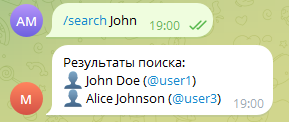



3. Если результатов нет:
   ```
   Ничего не найдено.
   ```


Для улучшения структуры проекта и разделения функционала на отдельные файлы, мы можем организовать код следующим образом:

1. **`bot.py`** — основной файл для запуска бота.
2. **`services/database_service.py`** — сервис для работы с базой данных.
3. **`handlers/command_handlers.py`** — обработчики команд бота.
4. **`handlers/message_handlers.py`** — обработчики текстовых сообщений.
5. **`handlers/error_handlers.py`** — обработчики ошибок.

---

### 1. Файл `services/database_service.py`

Этот файл будет содержать функции для работы с базой данных.

```python
import sqlite3

# Инициализация базы данных
def initialize_database():
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS users (
        user_id INTEGER PRIMARY KEY,
        username TEXT,
        first_name TEXT,
        last_name TEXT
    )
    ''')
    conn.commit()
    conn.close()

# Добавление нескольких записей в базу данных
def add_multiple_users():
    users_data = [
        (1, 'user1', 'John', 'Doe'),
        (2, 'user2', 'Jane', 'Smith'),
        (3, 'user3', 'Alice', 'Johnson'),
        (4, 'user4', 'Bob', 'Brown'),
        (5, 'user5', 'Charlie', 'Davis')
    ]

    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.executemany('INSERT OR IGNORE INTO users (user_id, username, first_name, last_name) VALUES (?, ?, ?, ?)', users_data)
    conn.commit()
    conn.close()

# Сохранение информации о пользователе
def save_user(user_id, username, first_name, last_name):
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('INSERT OR IGNORE INTO users (user_id, username, first_name, last_name) VALUES (?, ?, ?, ?)',
                   (user_id, username, first_name, last_name))
    conn.commit()
    conn.close()

# Получение информации о пользователе
def get_user(user_id):
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('SELECT username, first_name, last_name FROM users WHERE user_id = ?', (user_id,))
    user_info = cursor.fetchone()
    conn.close()
    return user_info

# Поиск пользователей
def search_users(query):
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('''
        SELECT username, first_name, last_name FROM users
        WHERE first_name LIKE ? OR last_name LIKE ? OR username LIKE ?
    ''', (f'%{query}%', f'%{query}%', f'%{query}%'))
    results = cursor.fetchall()
    conn.close()
    return results
```

---

### 2. Файл `handlers/command_handlers.py`

Этот файл будет содержать обработчики команд бота.

```python
from telegram import Update, ReplyKeyboardMarkup
from telegram.ext import CallbackContext
import asyncio
from services.database_service import save_user, get_user, search_users

# Обработчик команды /start
async def start(update: Update, context: CallbackContext) -> None:
    user = update.message.from_user
    user_id = user.id
    username = user.username
    first_name = user.first_name
    last_name = user.last_name

    # Сохранение информации о пользователе в базу данных
    save_user(user_id, username, first_name, last_name)

    # Создаем меню с кнопками
    keyboard = [['/start', '/help'], ['/info', '/settings'], ['/profile', '/search']]
    reply_markup = ReplyKeyboardMarkup(keyboard, resize_keyboard=True)
    
    await update.message.reply_text('Привет! Я простой чат-бот. Как я могу помочь вам сегодня?', reply_markup=reply_markup)

# Обработчик команды /help
async def help_command(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Это команда помощи. Здесь вы можете найти информацию о том, как использовать бота.')

# Обработчик команды /info
async def info_command(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Это команда информации. Здесь вы можете узнать больше о боте.')

# Обработчик команды /settings
async def settings_command(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Это команда настроек. Здесь вы можете настроить параметры бота.')

# Обработчик команды /profile
async def profile_command(update: Update, context: CallbackContext) -> None:
    user_id = update.message.from_user.id

    # Получение информации о пользователе из базы данных
    user_info = get_user(user_id)

    if user_info:
        username, first_name, last_name = user_info
        await update.message.reply_text(f'Ваш профиль:\nUsername: {username}\nИмя: {first_name}\nФамилия: {last_name}')
    else:
        await update.message.reply_text('Информация о вас не найдена.')

# Обработчик команды /search
async def search_command(update: Update, context: CallbackContext) -> None:
    # Получаем аргументы команды (например, /search John)
    search_query = ' '.join(context.args).strip()

    if not search_query:
        await update.message.reply_text('Пожалуйста, укажите запрос для поиска. Например: /search John')
        return

    # Отправляем сообщение "Пожалуйста, подождите..."
    wait_message = await update.message.reply_text('Пожалуйста, подождите, пока я думаю...')

    # Имитация задержки (например, для сложных запросов)
    await asyncio.sleep(2)  # Задержка в 2 секунды

    # Поиск пользователей в базе данных
    results = search_users(search_query)

    # Удаляем сообщение "Пожалуйста, подождите..."
    await context.bot.delete_message(chat_id=update.message.chat_id, message_id=wait_message.message_id)

    if results:
        response = "Результаты поиска:\n"
        for username, first_name, last_name in results:
            response += f"👤 {first_name} {last_name} (@{username})\n"
        await update.message.reply_text(response)
    else:
        await update.message.reply_text('Ничего не найдено.')
```

---

### 3. Файл `handlers/message_handlers.py`

Этот файл будет содержать обработчики текстовых сообщений.

```python
from telegram import Update
from telegram.ext import CallbackContext

# Обработчик текстовых сообщений
async def echo(update: Update, context: CallbackContext) -> None:
    user_message = update.message.text
    await update.message.reply_text(f'Вы сказали: {user_message}')
```

---

### 4. Файл `handlers/error_handlers.py`

Этот файл будет содержать обработчики ошибок.

```python
import logging

# Обработчик ошибок
async def error(update: Update, context: CallbackContext) -> None:
    logging.warning(f'Update {update} caused error {context.error}')
```

---

### 5. Файл `simplebot.py`

Этот файл будет основным для запуска бота.

```python
import logging
from telegram.ext import Application, CommandHandler, MessageHandler, filters
from services.database_service import initialize_database, add_multiple_users
from handlers.command_handlers import start, help_command, info_command, settings_command, profile_command, search_command
from handlers.message_handlers import echo
from handlers.error_handlers import error

# Настройка логирования
logging.basicConfig(
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    level=logging.INFO
)
logger = logging.getLogger(__name__)

# Функция main
def main() -> None:
    # Инициализация базы данных
    initialize_database()

    # Добавление нескольких записей в базу данных
    add_multiple_users()

    # Замените "YOUR_TELEGRAM_BOT_TOKEN" на ваш токен
    token = "YOUR_TELEGRAM_BOT_TOKEN"

    # Создаем приложение
    application = Application.builder().token(token).build()

    # Регистрация обработчиков
    application.add_handler(CommandHandler("start", start))
    application.add_handler(CommandHandler("help", help_command))
    application.add_handler(CommandHandler("info", info_command))
    application.add_handler(CommandHandler("settings", settings_command))
    application.add_handler(CommandHandler("profile", profile_command))
    application.add_handler(CommandHandler("search", search_command))
    application.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, echo))

    # Регистрация обработчика ошибок
    application.add_error_handler(error)

    # Запуск бота
    logger.info("Бот запущен и работает...")
    application.run_polling()

# Запуск бота
if __name__ == '__main__':
    main()
```

---

### Структура проекта

```
project/
│
├── simplebot.py
│
├── services/
│   └── database_service.py
│
├── handlers/
│   ├── command_handlers.py
│   ├── message_handlers.py
│   └── error_handlers.py
│
└── bot_database.db
```

---

### Преимущества такой структуры

1. **Разделение ответственности**:
   - Каждый файл отвечает за свою часть функционала.
2. **Удобство поддержки**:
   - Легче находить и исправлять ошибки.
3. **Масштабируемость**:
   - Можно добавлять новые функции, не перегружая основной файл.


### Реализация двустороннего обмена файлами в Telegram-боте

Для реализации функционала, позволяющего пользователю отправлять файлы боту, а боту — отправлять файлы пользователю, необходимо добавить соответствующие обработчики и команды. Вот как это можно сделать:



### 1. Отправка файлов пользователю

Для отправки файлов пользователю используются методы Telegram Bot API:
- `send_photo` — для отправки изображений.
- `send_audio` — для отправки аудио.
- `send_document` — для отправки документов.



### 2. Обновленный код

#### Файл `handlers/file_handlers.py`

Добавим обработчики для получения файлов от пользователя и отправки их обратно.

```python
from telegram import Update
from telegram.ext import CallbackContext

# Обработчик для получения фото от пользователя
async def handle_photo(update: Update, context: CallbackContext) -> None:
    photo = update.message.photo[-1]
    file = await photo.get_file()
    await file.download_to_drive('user_photo.jpg')
    await update.message.reply_text('Фото успешно получено и сохранено!')

    # Отправляем фото обратно пользователю
    with open('user_photo.jpg', 'rb') as photo_file:
        await update.message.reply_photo(photo=photo_file, caption="Вот ваше фото!")

# Обработчик для получения аудио от пользователя
async def handle_audio(update: Update, context: CallbackContext) -> None:
    audio = update.message.audio
    file = await audio.get_file()
    await file.download_to_drive(f'user_audio_{audio.file_name}')
    await update.message.reply_text('Аудио успешно получено и сохранено!')

    # Отправляем аудио обратно пользователю
    with open(f'user_audio_{audio.file_name}', 'rb') as audio_file:
        await update.message.reply_audio(audio=audio_file, caption="Вот ваше аудио!")

# Обработчик для получения документа от пользователя
async def handle_document(update: Update, context: CallbackContext) -> None:
    document = update.message.document
    file = await document.get_file()
    await file.download_to_drive(f'user_document_{document.file_name}')
    await update.message.reply_text('Документ успешно получен и сохранен!')

    # Отправляем документ обратно пользователю
    with open(f'user_document_{document.file_name}', 'rb') as doc_file:
        await update.message.reply_document(document=doc_file, caption="Вот ваш документ!")
```


#### Файл `simplebot.py`

Добавим обработчики для получения файлов от пользователя.

```python
from telegram.ext import Application, MessageHandler, filters
from handlers.file_handlers import handle_photo, handle_audio, handle_document

def main() -> None:
    # Замените "YOUR_TELEGRAM_BOT_TOKEN" на ваш токен
    token = "YOUR_TELEGRAM_BOT_TOKEN"

    # Создаем приложение
    application = Application.builder().token(token).build()

    # Регистрация обработчиков файлов
    application.add_handler(MessageHandler(filters.PHOTO, handle_photo))
    application.add_handler(MessageHandler(filters.AUDIO, handle_audio))
    application.add_handler(MessageHandler(filters.Document.ALL, handle_document))

    # Запуск бота
    application.run_polling()
```


### 3. Пример работы

1. **Пользователь отправляет фото**:
   - Бот сохраняет фото и отправляет его обратно с сообщением: `Вот ваше фото!`.

2. **Пользователь отправляет аудио**:
   - Бот сохраняет аудио и отправляет его обратно с сообщением: `Вот ваше аудио!`.

3. **Пользователь отправляет документ**:
   - Бот сохраняет документ и отправляет его обратно с сообщением: `Вот ваш документ!`.


### 4. Отправка файлов по запросу

Добавим команду `/send_file`, чтобы бот мог отправлять файлы по запросу.

#### Файл `handlers/command_handlers.py`

```python
from telegram import Update
from telegram.ext import CallbackContext

async def send_file_command(update: Update, context: CallbackContext) -> None:
    # Отправляем фото
    with open('example_photo.jpg', 'rb') as photo_file:
        await update.message.reply_photo(photo=photo_file, caption="Вот пример фото!")

    # Отправляем аудио
    with open('example_audio.mp3', 'rb') as audio_file:
        await update.message.reply_audio(audio=audio_file, caption="Вот пример аудио!")

    # Отправляем документ
    with open('example_document.pdf', 'rb') as doc_file:
        await update.message.reply_document(document=doc_file, caption="Вот пример документа!")
```


#### Файл `simplebot.py`

Добавим обработчик команды `/send_file`.

```python
from telegram.ext import Application, CommandHandler
from handlers.command_handlers import send_file_command

def main() -> None:
    # Замените "YOUR_TELEGRAM_BOT_TOKEN" на ваш токен
    token = "YOUR_TELEGRAM_BOT_TOKEN"

    # Создаем приложение
    application = Application.builder().token(token).build()

    # Регистрация обработчиков
    application.add_handler(CommandHandler("send_file", send_file_command))

    # Запуск бота
    application.run_polling()
```


### 5. Пример работы команды `/send_file`

1. Пользователь отправляет команду `/send_file`.
2. Бот отправляет:
   - Пример фото с подписью: `Вот пример фото!`.
   - Пример аудио с подписью: `Вот пример аудио!`.
   - Пример документа с подписью: `Вот пример документа!`.



### 6. Обновленная структура проекта

```
project/
│
├── simplebot.py
│
├── handlers/
│   ├── command_handlers.py
│   ├── file_handlers.py
│
├── example_photo.jpg
├── example_audio.mp3
├── example_document.pdf
│
└── bot_database.db
```


Приведем весь кода в одном месте:
```python
import logging
import sqlite3
import asyncio
from telegram import Update, ReplyKeyboardMarkup
from telegram.ext import Application, CommandHandler, MessageHandler, filters, CallbackContext

# Настройка логирования
logging.basicConfig(
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    level=logging.INFO
)
logger = logging.getLogger(__name__)

# Инициализация базы данных
def initialize_database():
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS users (
        user_id INTEGER PRIMARY KEY,
        username TEXT,
        first_name TEXT,
        last_name TEXT
    )
    ''')
    conn.commit()
    conn.close()

# Добавление нескольких записей в базу данных
def add_multiple_users():
    users_data = [
        (1, 'user1', 'John', 'Doe'),
        (2, 'user2', 'Jane', 'Smith'),
        (3, 'user3', 'Alice', 'Johnson'),
        (4, 'user4', 'Bob', 'Brown'),
        (5, 'user5', 'Charlie', 'Davis')
    ]

    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.executemany('INSERT OR IGNORE INTO users (user_id, username, first_name, last_name) VALUES (?, ?, ?, ?)', users_data)
    conn.commit()
    conn.close()

# Обработчик команды /start
async def start(update: Update, context: CallbackContext) -> None:
    user = update.message.from_user
    user_id = user.id
    username = user.username
    first_name = user.first_name
    last_name = user.last_name

    # Сохранение информации о пользователе в базу данных
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('INSERT OR IGNORE INTO users (user_id, username, first_name, last_name) VALUES (?, ?, ?, ?)',
                   (user_id, username, first_name, last_name))
    conn.commit()
    conn.close()

    # Создаем меню с кнопками
    keyboard = [
        ['Отправить фото', 'Получить фото'],  # Новые кнопки
        ['/start', '/help'],
        ['/info', '/settings'],
        ['/profile', '/search']
    ]
    reply_markup = ReplyKeyboardMarkup(keyboard, resize_keyboard=True)
    
    await update.message.reply_text('Привет! Я простой чат-бот. Как я могу помочь вам сегодня?', reply_markup=reply_markup)

# Обработчик команды /help
async def help_command(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Это команда помощи. Здесь вы можете найти информацию о том, как использовать бота.')

# Обработчик команды /info
async def info_command(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Это команда информации. Здесь вы можете узнать больше о боте.')

# Обработчик команды /settings
async def settings_command(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Это команда настроек. Здесь вы можете настроить параметры бота.')

# Обработчик команды /profile
async def profile_command(update: Update, context: CallbackContext) -> None:
    user_id = update.message.from_user.id

    # Получение информации о пользователе из базы данных
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('SELECT username, first_name, last_name FROM users WHERE user_id = ?', (user_id,))
    user_info = cursor.fetchone()
    conn.close()

    if user_info:
        username, first_name, last_name = user_info
        await update.message.reply_text(f'Ваш профиль:\nUsername: {username}\nИмя: {first_name}\nФамилия: {last_name}')
    else:
        await update.message.reply_text('Информация о вас не найдена.')

# Обработчик команды /search
async def search_command(update: Update, context: CallbackContext) -> None:
    # Получаем аргументы команды (например, /search John)
    search_query = ' '.join(context.args).strip()

    if not search_query:
        await update.message.reply_text('Пожалуйста, укажите запрос для поиска. Например: /search John')
        return

    # Отправляем сообщение "Пожалуйста, подождите..."
    wait_message = await update.message.reply_text('Пожалуйста, подождите, пока я думаю...')

    # Имитация задержки (например, для сложных запросов)
    await asyncio.sleep(2)  # Задержка в 2 секунды

    # Поиск пользователей в базе данных
    conn = sqlite3.connect('bot_database.db')
    cursor = conn.cursor()
    cursor.execute('''
        SELECT username, first_name, last_name FROM users
        WHERE first_name LIKE ? OR last_name LIKE ? OR username LIKE ?
    ''', (f'%{search_query}%', f'%{search_query}%', f'%{search_query}%'))
    results = cursor.fetchall()
    conn.close()

    # Удаляем сообщение "Пожалуйста, подождите..."
    await context.bot.delete_message(chat_id=update.message.chat_id, message_id=wait_message.message_id)

    if results:
        response = "Результаты поиска:\n"
        for username, first_name, last_name in results:
            response += f"👤 {first_name} {last_name} (@{username})\n"
        await update.message.reply_text(response)
    else:
        await update.message.reply_text('Ничего не найдено.')

# Обработчик для получения фото от пользователя
async def handle_photo(update: Update, context: CallbackContext) -> None:
    photo = update.message.photo[-1]
    file = await photo.get_file()
    await file.download_to_drive('user_photo.jpg')
    await update.message.reply_text('Фото успешно получено и сохранено!')

    # Отправляем фото обратно пользователю
    with open('user_photo.jpg', 'rb') as photo_file:
        await update.message.reply_photo(photo=photo_file, caption="Вот ваше фото!")

# Обработчик для получения аудио от пользователя
async def handle_audio(update: Update, context: CallbackContext) -> None:
    audio = update.message.audio
    file = await audio.get_file()
    await file.download_to_drive(f'user_audio_{audio.file_name}')
    await update.message.reply_text('Аудио успешно получено и сохранено!')

    # Отправляем аудио обратно пользователю
    with open(f'user_audio_{audio.file_name}', 'rb') as audio_file:
        await update.message.reply_audio(audio=audio_file, caption="Вот ваше аудио!")

# Обработчик для получения документа от пользователя
async def handle_document(update: Update, context: CallbackContext) -> None:
    document = update.message.document
    file = await document.get_file()
    await file.download_to_drive(f'user_document_{document.file_name}')
    await update.message.reply_text('Документ успешно получен и сохранен!')

    # Отправляем документ обратно пользователю
    with open(f'user_document_{document.file_name}', 'rb') as doc_file:
        await update.message.reply_document(document=doc_file, caption="Вот ваш документ!")

# Обработчик для кнопки "Отправить фото"
async def send_photo_button(update: Update, context: CallbackContext) -> None:
    await update.message.reply_text('Пожалуйста, отправьте фото.')

# Обработчик для кнопки "Получить фото"
async def get_photo_button(update: Update, context: CallbackContext) -> None:
    # Отправляем фото из файла
    with open('example_photo.jpg', 'rb') as photo_file:
        await update.message.reply_photo(photo=photo_file, caption="Вот пример фото!")

# Обработчик текстовых сообщений
async def echo(update: Update, context: CallbackContext) -> None:
    user_message = update.message.text
    await update.message.reply_text(f'Вы сказали: {user_message}')

# Обработчик ошибок
async def error(update: Update, context: CallbackContext) -> None:
    logger.warning(f'Update {update} caused error {context.error}')

# Функция main
def main() -> None:
    # Инициализация базы данных
    initialize_database()

    # Добавление нескольких записей в базу данных
    add_multiple_users()

    # Замените "YOUR_TELEGRAM_BOT_TOKEN" на ваш токен
    token = "7856723448:AAH_4egaNBSMGR7WccMEXOuVEkCIPMlAPvA"

    # Создаем приложение
    application = Application.builder().token(token).build()

    # Регистрация обработчиков команд
    application.add_handler(CommandHandler("start", start))
    application.add_handler(CommandHandler("help", help_command))
    application.add_handler(CommandHandler("info", info_command))
    application.add_handler(CommandHandler("settings", settings_command))
    application.add_handler(CommandHandler("profile", profile_command))
    application.add_handler(CommandHandler("search", search_command))

    # Регистрация обработчиков кнопок
    application.add_handler(MessageHandler(filters.Text("Отправить фото"), send_photo_button))
    application.add_handler(MessageHandler(filters.Text("Получить фото"), get_photo_button))

    # Регистрация обработчиков файлов
    application.add_handler(MessageHandler(filters.PHOTO, handle_photo))
    application.add_handler(MessageHandler(filters.AUDIO, handle_audio))
    application.add_handler(MessageHandler(filters.Document.ALL, handle_document))

    # Регистрация обработчика текстовых сообщений
    application.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, echo))

    # Регистрация обработчика ошибок
    application.add_error_handler(error)

    # Запуск бота
    logger.info("Бот запущен и работает...")
    application.run_polling()

# Запуск бота
if __name__ == '__main__':
    main()
```

### Преимущества

1. **Двусторонний обмен файлами**:
   - Пользователь может отправлять файлы боту, а бот может отправлять файлы пользователю.
2. **Гибкость**:
   - Можно легко добавить обработку других типов файлов (видео, голосовые сообщения и т.д.).
3. **Удобство**:
   - Пользователь получает обратно свои файлы или примеры файлов по запросу.



### Интеллектуальный чат-бот для взаимодействия с информацией о преподавателях (Часть 2)

В первой части лекции мы рассмотрели базовую структуру Telegram-бота, который взаимодействует с пользователями, используя базу данных и модель для ответов на вопросы. Во второй части мы углубимся в детали реализации, улучшим функциональность и добавим новые возможности.


### 1. **Улучшение структуры проекта**

Для удобства разработки и поддержки проекта, его структура должна быть организована следующим образом:

```
project/
│
├── main.py
│
├── Bot/
│   └── bot.py
│
├── database/
│   └── database.py
│
├── Services/
│   └── qa_service.py
│
├── requirements.txt
│
└── teachers.db
```



### 2. **Файл `requirements.txt`**

Для работы бота необходимы следующие библиотеки:

```
python-telegram-bot
transformers
torch
sqlite3
```

Установите их с помощью команды:

```bash
pip install -r requirements.txt
```



### 3. **База данных (`database.py`)**

База данных хранит информацию о преподавателях. Мы используем SQLite для простоты и удобства.

```python
import sqlite3

class Database:
    def __init__(self, db_name='teachers.db'):
        self.db_name = db_name
        self.create_database()  # Вызов метода при инициализации

    def create_database(self):
        """Создание базы данных и заполнение данными."""
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()

        # Создание таблицы (если она не существует)
        cursor.execute('''
        CREATE TABLE IF NOT EXISTS teachers (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            full_name TEXT NOT NULL,
            context TEXT NOT NULL
        )
        ''')

        # Проверка, есть ли данные в таблице
        cursor.execute("SELECT COUNT(*) FROM teachers")
        if cursor.fetchone()[0] == 0:
        # Добавление данных о преподавателях
            teachers_data = [                
                (
                    "Иванов Иван Иванович",
                    """
                    Иванов Иван Иванович — доктор физико-математических наук, профессор. Работает на кафедре «Высшей математики» в МГУ. Связаться с ним можно по электронной почте: IvanovII@msu.ru.  

                    Иван Иванович получил диплом доктора физико-математических наук 15 мая 2010 года, а высшее образование — 1 июня 2000 года в МГУ.  

                    Его общий трудовой стаж составляет 23 года, а педагогический стаж — 18 лет.  

                    Иванов Иван Иванович преподает такие дисциплины, как:  
                    - Высшая математика.  
                    - Линейная алгебра.  
                    - Математический анализ.  
                    - Теория вероятностей.  

                    Он является автором множества научных работ, включая учебники и монографии. Среди его ключевых работ выделяются:  
                    - Учебник «Высшая математика для технических вузов» (2015).  
                    - Монография «Современные методы математического анализа» (2018).  
                    """
                ),
                (
                    "Шайхутдинова Алина Айратовна",
                    """
                    Шайхутдинова Алина Айратовна — доцент, кандидат технических наук.
                    """
                )
            ]
            cursor.executemany("INSERT INTO teachers (full_name, context) VALUES (?, ?)", teachers_data)

        conn.commit()
        conn.close()

    def get_teachers(self):
        """Получение списка преподавателей."""
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()
        cursor.execute("SELECT id, full_name FROM teachers")
        teachers = cursor.fetchall()
        conn.close()
        return teachers

    def get_context(self, teacher_id):
        """Получение контекста по ID преподавателя."""
        conn = sqlite3.connect(self.db_name)
        cursor = conn.cursor()
        cursor.execute("SELECT context FROM teachers WHERE id = ?", (teacher_id,))
        result = cursor.fetchone()
        conn.close()
        return result[0] if result else None    
```



### 4. **Сервис для ответов на вопросы (`qa_service.py`)**

Используем модель `AlexKay/xlm-roberta-large-qa-multilingual-finedtuned-ru` для обработки вопросов пользователя.

```python
from transformers import pipeline

class QAService:
    def __init__(self):
        self.qa_model = pipeline("question-answering", model="AlexKay/xlm-roberta-large-qa-multilingual-finedtuned-ru")

    def answer_question(self, question, context):
        """Обработка вопроса пользователя."""
        if not context:
            return "Контекст не найден."
        result = self.qa_model(question=question, context=context)
        return result['answer']
```



### 5. **Основной код бота (`bot.py`)**

Бот обрабатывает команды `/start`, `/help` и текстовые сообщения.

```python
from telegram import Update, ReplyKeyboardMarkup
from telegram.ext import ApplicationBuilder, CommandHandler, ContextTypes, MessageHandler, filters
from database.database import Database
from Services.qa_service import QAService

class TelegramBot:
    def __init__(self):
        self.db = Database()  # База данных создается при инициализации
        self.qa_service = QAService()

    async def start(self, update: Update, context: ContextTypes.DEFAULT_TYPE):
        """Обработка команды /start."""
        # Получаем список преподавателей
        teachers = self.db.get_teachers()

        # Формируем сообщение с доступными преподавателями
        teachers_list = "Доступные преподаватели:\n"
        for teacher in teachers:
            teachers_list += f"{teacher[0]}. {teacher[1]}\n"
        teachers_list += "Введите ID преподавателя (или 'выход' для завершения):"

        # Отправляем сообщение пользователю
        await update.message.reply_text(teachers_list)

    async def help_command(self, update: Update, context: ContextTypes.DEFAULT_TYPE):
        """Обработка команды /help."""
        await update.message.reply_text('Список доступных команд:\n/start - Начать взаимодействие\n/help - Помощь')

    async def handle_message(self, update: Update, context: ContextTypes.DEFAULT_TYPE):
        """Обработка текстовых сообщений."""
        user_message = update.message.text

        # Если пользователь ввел "выход", завершаем взаимодействие
        if user_message.lower() == 'выход':
            await update.message.reply_text("Взаимодействие завершено. Для начала введите /start.")
            return

        # Проверяем, ввел ли пользователь ID преподавателя
        if user_message.isdigit():
            teacher_id = int(user_message)
            context_data = self.db.get_context(teacher_id)
            if context_data:
                await update.message.reply_text("Теперь задайте ваш вопрос:")
                context.user_data['teacher_id'] = teacher_id
            else:
                await update.message.reply_text("Преподаватель не найден. Попробуйте снова.")
        elif 'teacher_id' in context.user_data:
            question = user_message
            teacher_id = context.user_data['teacher_id']
            context_data = self.db.get_context(teacher_id)

            # Сообщаем пользователю, что бот "думает"
            await update.message.reply_text("Подождите, пожалуйста, я думаю...")
            await update.message.reply_chat_action(action="typing")

            # Получаем ответ от модели
            answer = self.qa_service.answer_question(question, context_data)
            await update.message.reply_text(f"Ответ: {answer}")
        else:
            await update.message.reply_text("Пожалуйста, выберите преподавателя по ID.")

    def run(self):
        """Запуск бота."""
        application = ApplicationBuilder().token('Ваш токен').build()
        application.add_handler(CommandHandler('start', self.start))
        application.add_handler(CommandHandler('help', self.help_command))
        application.add_handler(MessageHandler(filters.TEXT & ~filters.COMMAND, self.handle_message))
        application.run_polling()
```



### 6. **Запуск бота (`main.py`)**

```python
from Bot.bot import TelegramBot
from database.database import Database

if __name__ == "__main__":
    # Создание базы данных (если она еще не создана)
    db = Database()
    db.create_database()  # Явный вызов

    # Запуск бота
    bot = TelegramBot()
    bot.run()
```



### 7. **Пример работы бота**

1. Пользователь отправляет команду `/start`.
2. Бот выводит список преподавателей и просит ввести ID.
3. Пользователь вводит ID преподавателя.
4. Бот запрашивает вопрос.
5. Пользователь задает вопрос.
6. Бот обрабатывает вопрос и возвращает ответ.


### 8. **Дополнительные улучшения**

1. **Логирование**:
   - Добавьте логирование для отслеживания ошибок и действий пользователей. Используйте модуль `logging` для записи важных событий, таких как запуск бота, получение сообщений от пользователей и ошибки при обработке запросов. Это поможет в диагностике проблем и анализе поведения пользователей.
     ```python
     import logging

     logging.basicConfig(
         format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
         level=logging.INFO
     )
     logger = logging.getLogger(__name__)
     ```

2. **Кэширование**:
   - Используйте кэширование для ускорения работы модели. Например, можно кэшировать ответы на часто задаваемые вопросы или контекст преподавателей с помощью библиотеки `functools.lru_cache` или внешних решений, таких как Redis.
     ```python
     from functools import lru_cache

     @lru_cache(maxsize=100)
     def get_cached_context(teacher_id):
         return self.db.get_context(teacher_id)
     ```

3. **Масштабируемость**:
   - Рассмотрите возможность использования более мощной базы данных (например, PostgreSQL) для больших объемов данных. PostgreSQL поддерживает сложные запросы, индексацию и транзакции, что делает ее подходящей для масштабируемых приложений. Для работы с PostgreSQL можно использовать библиотеку `psycopg2` или асинхронную `asyncpg`.
     ```python
     import psycopg2

     conn = psycopg2.connect(
         dbname="your_db",
         user="your_user",
         password="your_password",
         host="localhost"
     )
     ```

4. **Интерфейс**:
   - Добавьте интерактивные кнопки для выбора преподавателей и команд. Используйте `ReplyKeyboardMarkup` или `InlineKeyboardMarkup` для создания удобного интерфейса. Например, вместо того чтобы просить пользователя вводить ID преподавателя, можно предложить список кнопок с именами преподавателей.
     ```python
     from telegram import ReplyKeyboardMarkup

     async def start(self, update: Update, context: ContextTypes.DEFAULT_TYPE):
         teachers = self.db.get_teachers()
         keyboard = [[teacher[1]] for teacher in teachers]
         reply_markup = ReplyKeyboardMarkup(keyboard, one_time_keyboard=True)
         await update.message.reply_text("Выберите преподавателя:", reply_markup=reply_markup)
     ```

5. **Обработка ошибок**:
   - Добавьте обработку ошибок для повышения устойчивости бота. Например, обрабатывайте исключения при работе с базой данных или моделью, чтобы бот не завершал работу при возникновении ошибок.
     ```python
     async def handle_message(self, update: Update, context: ContextTypes.DEFAULT_TYPE):
         try:
             user_message = update.message.text
             # Обработка сообщения
         except Exception as e:
             logger.error(f"Ошибка при обработке сообщения: {e}")
             await update.message.reply_text("Произошла ошибка. Пожалуйста, попробуйте позже.")
     ```

6. **Мультиязычность**:
   - Добавьте поддержку нескольких языков, если бот будет использоваться в международной аудитории. Можно использовать библиотеку `gettext` или хранить переводы в базе данных.

7. **Асинхронность**:
   - Убедитесь, что все операции, такие как запросы к базе данных и вызовы модели, выполняются асинхронно, чтобы бот оставался отзывчивым. Используйте асинхронные библиотеки, такие как `aiosqlite` или `asyncpg`.

8. **Тестирование**:
   - Напишите тесты для проверки функциональности бота. Используйте библиотеку `pytest` для модульного и интеграционного тестирования.

9. **Документация**:
   - Добавьте документацию для разработчиков и пользователей. Используйте инструменты, такие как Sphinx, для генерации документации из комментариев в коде.

10. **Мониторинг и аналитика**:
    - Внедрите систему мониторинга (например, Prometheus или Grafana) для отслеживания производительности бота и аналитики пользовательского поведения.

